# Project 5 - The incredible machine

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects needs to be submitted by uploading a Unix-`tar` archive containing the modified files `machine.py`, this notebook and probable additional files to [Projects/Project 5](https://ecampus.uni-bonn.de/goto_ecampus_exc_3025921.html) on eCampus. The name of your `tar`-archive should be `YOUR_NAME.tgz`. Please only include the  mentioned files above and *no* other files. Your project must be on eCampus by Thursday, 22.06.2023, 23:55. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Notes:** (1) In this project you can decide if you work in total with `Python`-scripts and -modules which needs to be developed for and executed on a `Linux`-environment, e.g. the `Desktop` within our Jupyterlab system or you can use the Jupyterlab-Editor and -Notebook (2) The tutors,  and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## The incredible machine

More than 25 years ago, there was a famous computer game "The incredible machine". I've see only a later version but the idea was to create a machine in which you can lead a ball through a labyrinth of walls and different small machines and tools which then solve a problem. 

However, this is not the task to write a game like this. What the most impression in these games was, that it based on physical rules and that you can start/stop features.

The brought me to the idea that I want to create a simulation in which you can add simply forces $F$ which changes the movement of a defined particle $p$ or for which you can simply add a wall, which is useful to reflect the particle. 

The best approach for this task is that all parts can be defined as classes which is then controlled by a supervisor system engine. For testing you can activate or deactivate any part, like an individual setup of a physical experimental.

---

### Name: Samiul Hossain Sajal

### 0. What is already implemented?

For this task the supervisor system engine is already defined which plays the role of an interface between defined parts, particles, forces and walls, and the animation engine, which were shown in the 2nd lecture. 

Also for demonstration a basic Particle class is defined, which has the these properties:
 * a `vector` $x$ for the position
 * a `vector` $v$ for the velocity
 * a float for the mass $m$
 
For creating a usable vector you can use the function `vector` which takes a $x$ and $y$ value to form a vector. 

However, these are the basic properties. One extension would be to add more physical parameters which are special to certain kind of particle.

In the next cell, there is a test setup of an experiment. There is one particle which starts at $(0,0)$ with a speed `vector` in 45 degrees into the upper right direction. The simulation lasts for `10` seconds with a time step of `0.1` seconds.

In [1]:
# one particle moving 45 degree upper right direction
# no force applied


from IPython.display import HTML
from machine import vector, System, Particle

s = System(10,0.1,xlimits=(-10,10))
p1 = Particle(vector(0,0), vector(1,1),0.1)
s.add_particle(p1)

anim = s.simulate()


# show the animation
HTML(anim.to_jshtml())

As you can see, the simulation is basically doing nothing, since there is no physics implemented for the `Particle` class.

---

There is also a basic `Update` class defined, which will be inherited by the classes `Force`, `Wall` and `Particle`. The idea is, that during a simulation for each step properties of these classes can change. For a `Particle` this is of course the new position and velocity according to the time step. But also a `Force` can be dynamically modified during a simulation as well a `Wall` can e.g. change position. Dynamical processes are not part of these tasks, but feel free to implement further features.

---

## 1. Add physics to the Particle class

As shown before the Particle class has an unimplemented method update, which is used to update the position and velocity of the particle. The start position is given and since this a force free start the velocity will not change.

**Task:**
Implement a proper `update` method. Work directly in the file `machine.py`. Test your modified particle with the demo code above. 

**Hints:**
 * The tasks are a combination of writing a module script and some test codes. I prefer to watch the animation in the notebook, however for doing this you need to restart the notebook kernel for each modification `Kernel->Restart Kernel`. Alternatively you run the demo code in a script as well and saves the animation in a .mp4 video. Please document you decision at this point in the notebook!
 * for the `update` method, you will find the `deltaT` argument quite useful

In [2]:
# How is your solution organized?

# I have modified the machine.py seperated file that was provided
# the animation is shown in this notebook
# before avary run, restart karnel is recomanded

---

## 2. Definition of Forces (I)

To add physical forces which work on a particle is part of the simulation. Physically if we have the force `F` which works on a particle `p` with a mass `m` it will generate an additional acceleration:

$$ a = \frac{F}{m} $$

and for a small time step $\Delta t$ produces a speed change $\Delta v$:

$$ \Delta v = a\cdot \Delta T$$

Of course you can use vectors for $F$, $a$  and $v$.

If you have defined multiple Forces $F_1$,$F_2$,$F_3$,... you can define $F$ as:

$$ F = \sum_i F_i $$

Before we start to define special forces, we need to apply the handling of forces in the `Particle` class. 

The setup of the `Particle` class has already a list of all defined forces in the property `self._forces` as a list of objects which bases on the class `Force`. The `calculate` method of a `Force` object returns the real force (as a vector) for a given position $x$, velocity $v$ and mass $m$. 

**Task:**

Add the use of forces to the `update` method of the `Particle` class. 

**Hints:**
 * do the modification of the velocity $v$ before you apply the velocity to the position $x$

---

## 3. Definition of Forces (II)

Now that we have the possibility to use forces for our simulation, we should define a new `Force` e.g. gravity.

For all new `Force` definition you need to create a new class definition which inherits the base class `Force`. To use the new class, you also need to define a new 
`calculate` method, in which you return the new force accordingly to the given parameter.

**Task**: Create a new class definition in the module `machine.py` `Gravity`. For initialization of the new class the user should give a value for the gravity. Test the following demo code:

In [3]:
### Only gravitational force applied to the particle
# Any kind of boundary is not set here

from IPython.display import HTML
from machine import vector, System, Particle, Gravity, Floor


# new gravity force
g = Gravity(-2)  
        
s = System(20,0.1,xlimits=(0,20))
p1 = Particle(vector(0,0), vector(1,4), 0.1)
s.add_particle(p1)
s.add_force(g)

# calculate the simulation
anim = s.simulate()

# show the animation
HTML(anim.to_jshtml())

---

## 4. Definition of Walls

After adding forces we want to add *boundaries* to the simulation which can be implemented as `Walls`. The task for a wall is, for a given `position` and `velocity`(and probably mass), to return a new `velocity` and an updated position. 

A `Wall` can be implemented as a inherited class with `Wall` as the base class. Similar to `Force` the method `calculate` will be called for the `Wall`s algorithm. It should return a `position` and a `velocity`.

**Task:** For our demo example where we have a ball flying to the sky and who is returning to the floor by gravity, a wall which will define the `floor` is a nice task. Implement a `Floor` class which is doing nothing, except if the $y$ position of a particle is below 0, then the wall should reflect the particle. Obviously, the particle should have now the $y$-position 0 instead of a negative value. Modify also the `update` method of the `Particle` class to work with `Wall` instances.

**Hints:**

 * the system engine has all `Wall` instances and hand these over to the particle instance as a property `self._walls`
 * Walls should have an effect after all forces are applied, to be sure that positions and velocities are correct

My demo code looks like this now:

In [4]:
### All boundary has been activated to this code with 
### gravitational force on the particle


from IPython.display import HTML
from machine import vector, System, Particle, Gravity, Floor, SystemVelocity
import numpy as np
import matplotlib.pyplot as plt




# new gravity force
g = Gravity(-2)  

# create an object "s" using class "System"
s = System(20,0.1,xlimits=(0,20))

# create an object "p1" using class "Particle"
# initial position vector of the particle is 0,0
# initial velocity vector of the particle is 3,3
# mass 0.1
p1 = Particle(vector(0,0), vector(3,3), 0.1)

# add the particle to class "System" using "add_particle" function
s.add_particle(p1)

# add the force to class "System" using "add_force" function
s.add_force(g)

# create an object "w" using class "Floor"
w = Floor(-10,10,20,-0.01)
# add the boundaries to class "System" using "add_wall" function
s.add_wall(w)

anim = s.simulate()

# show the animation
HTML(anim.to_jshtml())



The next cell shows the video of my solution! I've added an additional wall at $x=10$.

In [5]:
from IPython.display import Video

Video("./figs/bouncing.mp4")

---

## 5. Analyzing data

If you have a look at the defined System engine, a special method analyze will be called after every simulation step. This method can be used to create some additional plots with the data from the simulation.

**Task:** 
Create a plot to the previous created simulation of the bouncing ball, in which the total velocity $v$ is plotted vs. the simulation time index $t$. Create a new class SystemVelocity, which records the current velocity in the method analyze. Write a new method get_speed_data which returns a numpy array for the recorded times and total velocities individually.

**Hints:**
 * despite the possibility to have multiple particles, you can record the data from the first particle only
 * you need to initialize the numpy arrays before the simulation starts, the size of the array can be calculated from the arguments for __init__
 * the use of Python lists for the recorded data is forbidden!

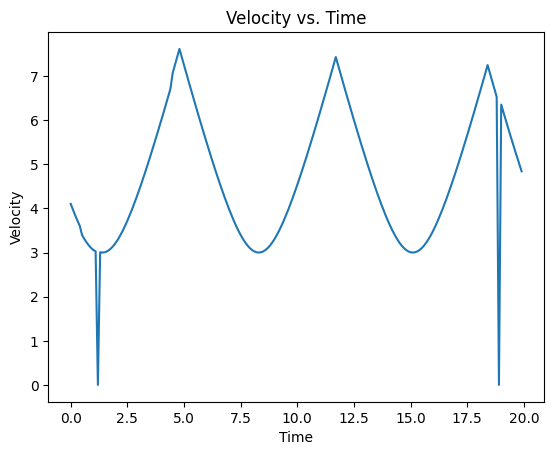

In [6]:
# Analysis of the velocity of the particle with respect
# to time.

# extrace the velocity and time
particle_velocity = s._system_velocity         
speed_data = particle_velocity.get_speed_data()  

all_times = speed_data[:, 0]  # time
all_velocities = speed_data[:, 1]  # velocity

plt.plot(all_times, all_velocities)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs. Time')
plt.show()




In the above plot, There are two point where the value of velocity is zero. But It's a bug.

---

## General notes

* you are working with classes, so in your solution you can add new methods and properties if needed
* write a useful documentation for each method you created or modified (e.g. the logic behind the method, argument, return values)
* write the code step by step, if you unsure about any of the tasks, ask your tutor or ask the question in the forum or mail me (Oliver)

---

## Epilogue

In this project, we only use a few parts of the possibilities of the simulation engine. One idea of the concept, that you can e.g. create forces or wall which works only for specific regions. So it is possible to simulate a bullet flying through different materials to see how this material changes the speed over time. Also you can create complex setup of walls and check which initial speed is necessary to bring a ball in a special target position. I guess that this simple program has a lot of possibilities and can create also a little bit fun!